In [5]:
import cv2
from sklearn import svm
from os import listdir
from os.path import isfile, join
from matplotlib import pyplot as plt

model = svm.SVC()



In [20]:
def preprocess(path, resize=(160, 90)):
    img = cv2.imread(path)
    if img is None:
        return None

    # img = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
    # img = cv2.equalizeHist(img)
    if resize is not False:
        img = cv2.resize(img, resize)
    
    return img

def scan(path, label, scan=False):
    features = []
    labels = []
    paths = []
    
    for image in [f for f in listdir(path) if isfile(join(path, f))]:
        img = preprocess(path + image)
        
        try:
            feature = hog_features(img)
        except:
            print("HOG error!")
            continue
        feature = feature.reshape((feature.shape[0],))

        paths.append(path + image)
        features.append(feature)
        labels.append(label)
        
    return paths, features, labels

def predict(path):
    
    print("detectMultiScale('%s')" % path)
    img = preprocess(path, resize=False)
    if img is None:
        return
    
    (rects, weights) = hog.detectMultiScale(img)
    
    idx = 0
    for x, y, w, h in rects:
        print("Confidence: %f" % weights[idx])
        cv2.rectangle(img, (x, y),
                              (x+w, y+h), (0, 255, 0), 2)
        idx += 1

    plt.imshow(img)
    plt.show()

In [3]:
X = []
Y = []
P = []

positive_training_path = "/Users/cvance/Git/ImageNet_Utils/n00007846/n00007846_urlimages/"
negative_training_path = "/Users/cvance/Git/ImageNet_Utils/n04105893/n04105893_urlimages/"

p, x, y = scan(positive_training_path, 1.0, scan=False)
X.extend(x)
Y.extend(y)
P.extend(p)

p, x, y = scan(negative_training_path, 0.0, scan=True)
X.extend(x)
Y.extend(y)
P.extend(p)

print("Feature Extraction Done.")

HOG error!
HOG error!
HOG error!
HOG error!
HOG error!
HOG error!
HOG error!
HOG error!
HOG error!
HOG error!
HOG error!
HOG error!
HOG error!
HOG error!
HOG error!
HOG error!
HOG error!
HOG error!
HOG error!
HOG error!
Feature Extraction Done.


In [7]:
# print(model.fit(X, Y))
# hog.setSVMDetector(model.support_vectors_[0])

hog = cv2.HOGDescriptor()
hog.setSVMDetector(cv2.HOGDescriptor_getDefaultPeopleDetector())

detectMultiScale('/Users/cvance/Git/data-analysis/training/test/.DS_Store')
detectMultiScale('/Users/cvance/Git/data-analysis/training/test/snap_8.jpg')


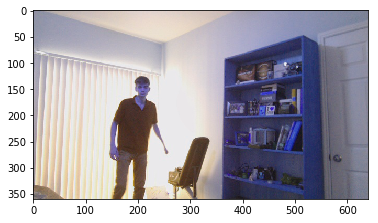

detectMultiScale('/Users/cvance/Git/data-analysis/training/test/snap_9.jpg')


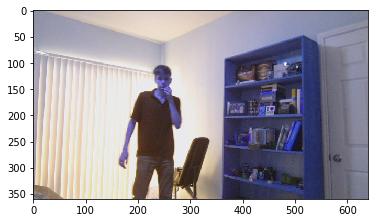

detectMultiScale('/Users/cvance/Git/data-analysis/training/test/snap_7.jpg')
Confidence: 1.082444


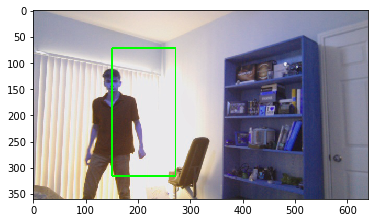

detectMultiScale('/Users/cvance/Git/data-analysis/training/test/snap_6.jpg')


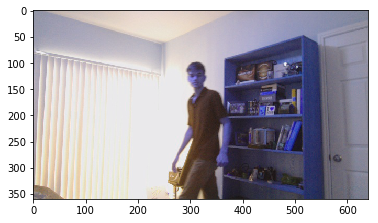

detectMultiScale('/Users/cvance/Git/data-analysis/training/test/snap_4.jpg')


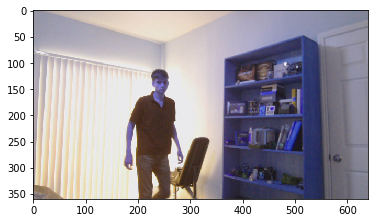

detectMultiScale('/Users/cvance/Git/data-analysis/training/test/snap_5.jpg')


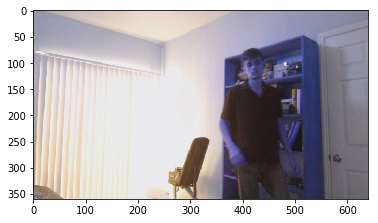

detectMultiScale('/Users/cvance/Git/data-analysis/training/test/snap_1.jpg')


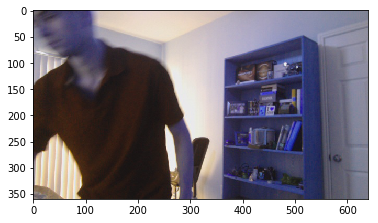

detectMultiScale('/Users/cvance/Git/data-analysis/training/test/snap_2.jpg')
Confidence: 0.420657
Confidence: 0.447833


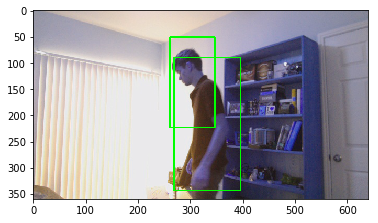

detectMultiScale('/Users/cvance/Git/data-analysis/training/test/snap_10.jpg')


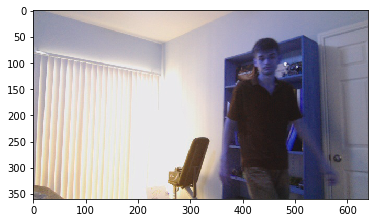

detectMultiScale('/Users/cvance/Git/data-analysis/training/test/snap_3.jpg')


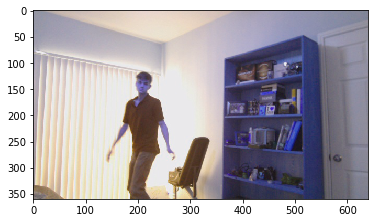

In [21]:
v_path = "/Users/cvance/Git/data-analysis/training/test/"
for image in [f for f in listdir(v_path) if isfile(join(v_path, f))]:
    predict(v_path + image)